The data set is taken from Kaggle. https://www.kaggle.com/datasets/aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge/code

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('dataset.csv')

Droping the usless columns

In [3]:
df2 = df.drop(["Patient Id",'Family Name',"Father's name","Institute Name", "Location of Institute", "Place of birth","Patient First Name","Test 1","Test 5","Test 2","Test 3","Test 4"],axis=1)

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      16047 non-null  float64
 7   Father's age                                      16097 non-null  float64
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [5]:
df2.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,NaN,23.0,Deceased,Tachypnea,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


checking the presence of NaN values in the data set

In [6]:
nan_count = df2.isna().sum() 
nan_count

Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mother's age                                        6036
Father's age                                        5986
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Parental consent                                    2125
Follow-up                                           2166
Gender                                              2173
Birth asphyxia                                      2139
Autopsy shows birth defect (if applicable)          1026
Folic acid details (peri-conceptional)              2117
H/O serious maternal illness   

In [7]:
df2.corr()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
Patient Age,1.000000,0.010819,-0.007588,-0.009797,-0.007281,-0.008489,0.003335,0.007506,-0.018755,-0.007470,-0.014463
Blood cell count (mcL),0.010819,1.000000,-0.007163,0.003303,-0.005995,-0.001037,0.005793,-0.003913,0.006519,0.005341,0.002281
Mother's age,-0.007588,-0.007163,1.000000,-0.000336,0.007844,0.015443,-0.006920,-0.012243,0.008079,-0.009321,0.011743
Father's age,-0.009797,0.003303,-0.000336,1.000000,0.000539,0.012954,0.005452,-0.003314,0.012519,-0.001118,0.011630
No. of previous abortion,-0.007281,-0.005995,0.007844,0.000539,1.000000,0.003807,-0.007495,0.007169,-0.000746,0.003735,-0.004264
White Blood cell count (thousand per microliter),-0.008489,-0.001037,0.015443,0.012954,0.003807,1.000000,0.000442,0.008489,0.008472,0.001592,-0.013023
Symptom 1,0.003335,0.005793,-0.006920,0.005452,-0.007495,0.000442,1.000000,0.002014,0.005559,-0.000530,0.015840
Symptom 2,0.007506,-0.003913,-0.012243,-0.003314,0.007169,0.008489,0.002014,1.000000,0.008689,0.014627,0.011601
Symptom 3,-0.018755,0.006519,0.008079,0.012519,-0.000746,0.008472,0.005559,0.008689,1.000000,0.002794,0.028203
Symptom 4,-0.007470,0.005341,-0.009321,-0.001118,0.003735,0.001592,-0.000530,0.014627,0.002794,1.000000,0.036785


Replacing NaN values with mode of the column

In [8]:
def fill_nan_with_mode(df):
    for column in df.columns:
        if df[column].isna().any():
            mode_value = df[column].mode().iloc[0]  # Calculate the mode of the column
            df[column].fillna(mode_value, inplace=True)  # Fill NaN values with the mode value

    return df

In [9]:
df2 = fill_nan_with_mode(df2)

In [10]:
nan_count = df2.isna().sum() 
nan_count

Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Mother's age                                        0
Father's age                                        0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Parental consent                                    0
Follow-up                                           0
Gender                                              0
Birth asphyxia                                      0
Autopsy shows birth defect (if applicable)          0
Folic acid details (peri-conceptional)              0
H/O serious maternal illness                        0
H/O radiation exposure (x-ra

In [11]:
df2.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,23.0,20.0,Alive,Normal (30-60),...,Singular,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,23.0,23.0,Deceased,Tachypnea,...,Multiple,5.522560,normal,1.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),...,Singular,3.000000,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,20.0,Deceased,Tachypnea,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,Yes,Yes,4.720703,32.0,20.0,Alive,Tachypnea,...,Multiple,4.098210,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders,Cancer


Changing strings to floats so model can understand the data

In [12]:
GenesM = pd.get_dummies(df2["Genes in mother's side"], drop_first = True, dtype=float)
GenesM.rename(columns = {'Yes':"Genes in mother's side"}, inplace = True)

InherF = pd.get_dummies(df2["Inherited from father"], drop_first = True, dtype=float)
InherF.rename(columns = {'Yes':"Inherited from father"}, inplace = True)

MatG = pd.get_dummies(df2["Maternal gene"], drop_first = True, dtype=float)
MatG.rename(columns = {'Yes':"Maternal gene"}, inplace = True)

PatG = pd.get_dummies(df2["Paternal gene"], drop_first = True, dtype=float)
PatG.rename(columns = {'Yes':"Paternal gene"}, inplace = True)

Status = pd.get_dummies(df2["Status"], drop_first = True, dtype=float)
Status.rename(columns = {'Deceased':"Status"}, inplace = True)

ResR = pd.get_dummies(df2["Respiratory Rate (breaths/min)"], drop_first = True, dtype=float)
ResR.rename(columns = {'Tachypnea':"Respiratory Rate (breaths/min)"}, inplace = True)

HeartR = pd.get_dummies(df2["Heart Rate (rates/min"], drop_first = True, dtype=float)
HeartR.rename(columns = {'Tachycardia':"Heart Rate (rates/min"}, inplace = True)

FollUp = pd.get_dummies(df2["Follow-up"], drop_first = True, dtype=float)
FollUp.rename(columns = {'Low':"Follow-up"}, inplace = True)

FolicA = pd.get_dummies(df2["Folic acid details (peri-conceptional)"], drop_first = True, dtype=float)
FolicA.rename(columns = {'Yes':"Folic acid details (peri-conceptional)"}, inplace = True)

HO = pd.get_dummies(df2["H/O serious maternal illness"], drop_first = True, dtype=float)
HO.rename(columns = {'Yes':"H/O serious maternal illness"}, inplace = True)

IVF = pd.get_dummies(df2["Assisted conception IVF/ART"], drop_first = True, dtype=float)
IVF.rename(columns = {'Yes':"Assisted conception IVF/ART"}, inplace = True)

HisAnomPreg = pd.get_dummies(df2["History of anomalies in previous pregnancies"], drop_first = True, dtype=float)
HisAnomPreg.rename(columns = {'Yes':"History of anomalies in previous pregnancies"}, inplace = True)

df2.drop(["Genes in mother's side","Inherited from father","Maternal gene", "Paternal gene","Status","Respiratory Rate (breaths/min)",
          "Heart Rate (rates/min","Parental consent","Follow-up","Folic acid details (peri-conceptional)",
         "H/O serious maternal illness","Assisted conception IVF/ART","History of anomalies in previous pregnancies"], axis = 1,inplace=True)


Merging the data set with new columns

In [13]:
train = pd.concat([df2,GenesM,InherF,MatG, PatG, Status,ResR,HeartR,FollUp,FolicA,HO,IVF,HisAnomPreg],axis=1)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  float64
 1   Blood cell count (mcL)                            22083 non-null  float64
 2   Mother's age                                      22083 non-null  float64
 3   Father's age                                      22083 non-null  float64
 4   Gender                                            22083 non-null  object 
 5   Birth asphyxia                                    22083 non-null  object 
 6   Autopsy shows birth defect (if applicable)        22083 non-null  object 
 7   H/O radiation exposure (x-ray)                    22083 non-null  object 
 8   H/O substance abuse                               22083 non-null  object 
 9   No. of previous a

In [15]:
train.head()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),H/O radiation exposure (x-ray),H/O substance abuse,No. of previous abortion,...,Maternal gene,Paternal gene,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Folic acid details (peri-conceptional),H/O serious maternal illness,Assisted conception IVF/ART,History of anomalies in previous pregnancies
0,2.0,4.760603,23.0,20.0,Ambiguous,Yes,Not applicable,No,No,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4.0,4.910669,23.0,23.0,Ambiguous,No,None,Not applicable,Not applicable,2.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,6.0,4.893297,41.0,22.0,Ambiguous,No record,Not applicable,Yes,-,4.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
3,12.0,4.705280,21.0,20.0,Male,Not available,No,-,Not applicable,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,11.0,4.720703,32.0,20.0,Male,Not available,Not applicable,-,Not applicable,4.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0


In [16]:
train['Birth asphyxia'] = [1 if i == 'Yes' else 0 for i in train['Birth asphyxia']]
train['H/O radiation exposure (x-ray)'] = [1 if i.strip() == 'Yes' else 0 for i in train['H/O radiation exposure (x-ray)']]
train['H/O substance abuse'] = [1 if i.strip() == 'Yes' else 0 for i in train['H/O substance abuse']]
train['Birth defects'] = [1 if i == 'Multiple' else 0 for i in train['Birth defects']]


In [17]:
train['Gender'] = [1 if j.strip() == 'Male' else (2 if j.strip() == 'Female' else 0) for j in train["Gender"]]

In [18]:
train["Avg mother and father age"] =(train["Mother's age"]+train["Father's age"])/2

In [19]:
train["Avg symptoms number"] = (train["Symptom 1"]+train["Symptom 2"]+train["Symptom 3"]+train["Symptom 4"]+train["Symptom 5"])/5

In [20]:
train.head()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),H/O radiation exposure (x-ray),H/O substance abuse,No. of previous abortion,...,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Folic acid details (peri-conceptional),H/O serious maternal illness,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Avg mother and father age,Avg symptoms number
0,2.0,4.760603,23.0,20.0,0,1,Not applicable,0,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.5,1.0
1,4.0,4.910669,23.0,23.0,0,0,None,0,0,2.0,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,23.0,0.8
2,6.0,4.893297,41.0,22.0,0,0,Not applicable,1,0,4.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,31.5,0.8
3,12.0,4.705280,21.0,20.0,1,0,No,0,0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,20.5,0.2
4,11.0,4.720703,32.0,20.0,1,0,Not applicable,0,0,4.0,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,26.0,0.0


In [21]:
train.drop(["Mother's age", "Father's age"],axis=1, inplace = True)

In [22]:
train['Autopsy shows birth defect (if applicable)'].unique()

array(['Not applicable', 'None', 'No', 'Yes'], dtype=object)

In [23]:
train['Blood test result'].unique()

array(['slightly abnormal', 'normal', 'inconclusive', 'abnormal'],
      dtype=object)

In [24]:
train['Blood test result'] = [float(3) if j.strip() == 'abnormal' else (float(2) if j.strip() == 'slightly abnormal' else (float(1) if j.strip() == 'inconclusive' else float(0) )) for j in train['Blood test result']]

In [25]:
train.head()

,Patient Age,Blood cell count (mcL),Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),H/O radiation exposure (x-ray),H/O substance abuse,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),...,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Folic acid details (peri-conceptional),H/O serious maternal illness,Assisted conception IVF/ART,History of anomalies in previous pregnancies,Avg mother and father age,Avg symptoms number
0,2.0,4.760603,0,1,Not applicable,0,0,2.0,0,9.857562,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,21.5,1.0
1,4.0,4.910669,0,0,None,0,0,2.0,1,5.522560,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,23.0,0.8
2,6.0,4.893297,0,0,Not applicable,1,0,4.0,0,3.000000,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,31.5,0.8
3,12.0,4.705280,1,0,No,0,0,1.0,0,7.919321,...,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,20.5,0.2
4,11.0,4.720703,1,0,Not applicable,0,0,4.0,1,4.098210,...,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,26.0,0.0


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  float64
 1   Blood cell count (mcL)                            22083 non-null  float64
 2   Gender                                            22083 non-null  int64  
 3   Birth asphyxia                                    22083 non-null  int64  
 4   Autopsy shows birth defect (if applicable)        22083 non-null  object 
 5   H/O radiation exposure (x-ray)                    22083 non-null  int64  
 6   H/O substance abuse                               22083 non-null  int64  
 7   No. of previous abortion                          22083 non-null  float64
 8   Birth defects                                     22083 non-null  int64  
 9   White Blood cell 

In [27]:
train['Genetic Disorder'].unique()

array(['Mitochondrial genetic inheritance disorders',
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases'], dtype=object)

In [28]:
train['Genetic Disorder'] = [1 if j.strip() == 'Mitochondrial genetic inheritance disorders' else (2 if j.strip() == 'Multifactorial genetic inheritance disorders' else 0) for j in train['Genetic Disorder']]

In [29]:
train['Disorder Subclass'].unique()

array(["Leber's hereditary optic neuropathy", 'Cystic fibrosis',
       'Diabetes', 'Leigh syndrome', 'Cancer', 'Tay-Sachs',
       'Hemochromatosis', 'Mitochondrial myopathy', "Alzheimer's"],
      dtype=object)

In [30]:
train['Disorder Subclass'] = [0 if j == "Leber's hereditary optic neuropathy"
                                else 1 if j == 'Cystic fibrosis' 
                                else 2 if j == 'Diabetes'
                                else 3 if j == 'Leigh syndrome'
                                else 4 if j == 'Cancer'
                                else 5 if j == 'Tay-Sachs'
                                else 6 if j == 'Hemochromatosis'
                                else 7 if j == 'Mitochondrial myopathy'
                                else 8 for j in train['Disorder Subclass']]

In [31]:
train["Autopsy shows birth defect (if applicable)"]= [0 if j == "None"
                                else 1 if j == 'No' 
                                else 2 if j == 'Yes'
                                else 3 for j in train["Autopsy shows birth defect (if applicable)"]]

Changing every possible column to float

In [32]:
train = train.apply(pd.to_numeric,downcast="float")

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       22083 non-null  float32
 1   Blood cell count (mcL)                            22083 non-null  float32
 2   Gender                                            22083 non-null  float32
 3   Birth asphyxia                                    22083 non-null  float32
 4   Autopsy shows birth defect (if applicable)        22083 non-null  float32
 5   H/O radiation exposure (x-ray)                    22083 non-null  float32
 6   H/O substance abuse                               22083 non-null  float32
 7   No. of previous abortion                          22083 non-null  float32
 8   Birth defects                                     22083 non-null  float32
 9   White Blood cell 

Correlation heatmap

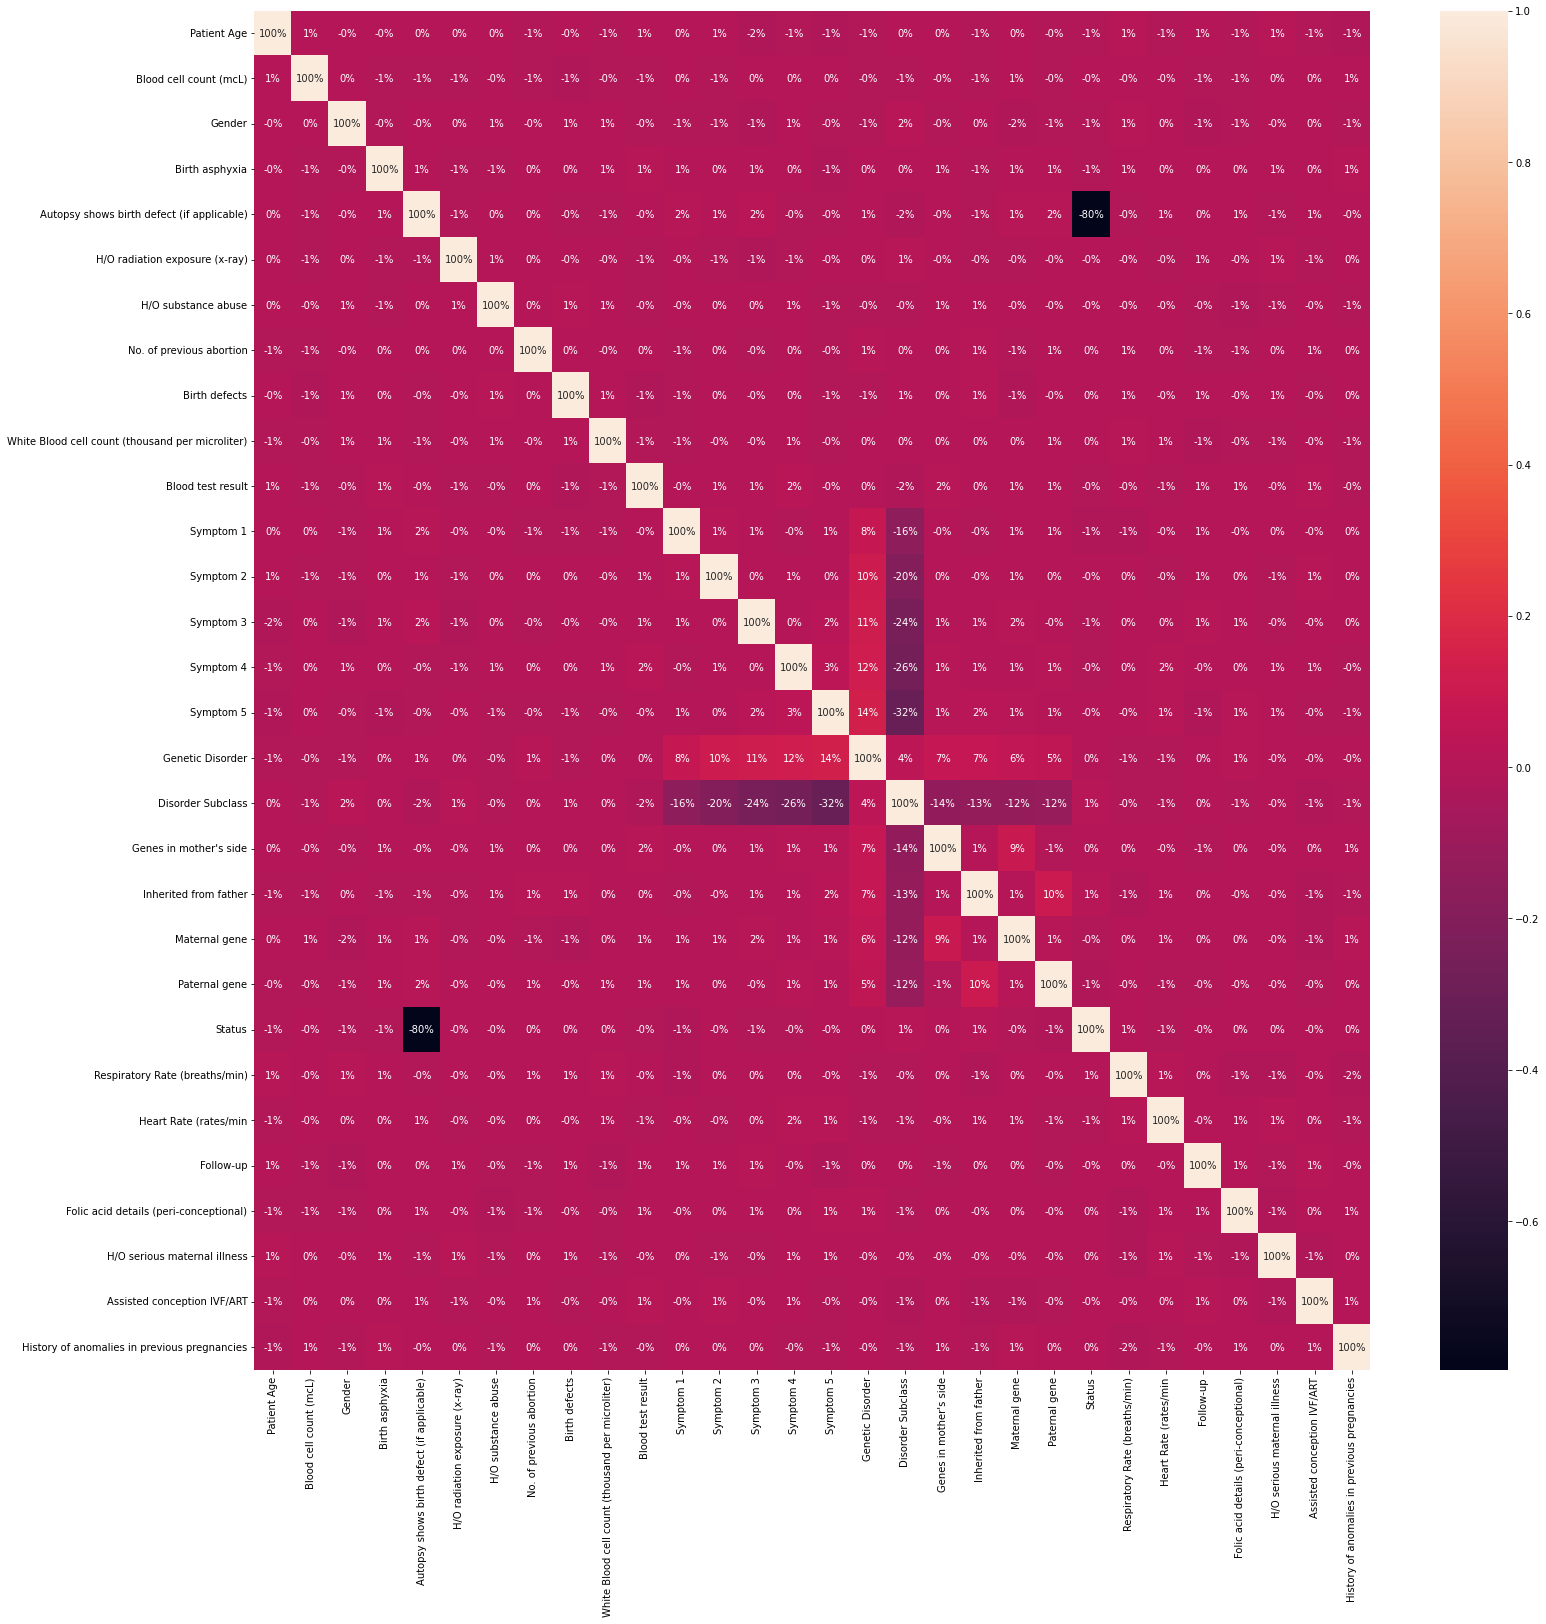

In [34]:
plt.figure(figsize=(25,25))
sns.heatmap(train.iloc[:,0:30].corr(),annot=True,fmt=".0%")
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

Dividing the data set for the training and the testing

In [36]:
X = train.drop(columns = 'Status')
y = train['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [37]:
from sklearn.preprocessing import StandardScaler

Scaling the data s oeach variable have simillar 'power'

In [38]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

Establishing the model

In [40]:
model = SVC()

In [41]:
model.fit(X_train,y_train)

SVC()

In [42]:
predictions = model.predict(X_test)


In [43]:
print(confusion_matrix(y_test,predictions))

[[2243    0]
 [ 205 1969]]


In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      2243
         1.0       1.00      0.91      0.95      2174

    accuracy                           0.95      4417
   macro avg       0.96      0.95      0.95      4417
weighted avg       0.96      0.95      0.95      4417



In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test, predictions)

0.9535884084220059

In [47]:
from sklearn.model_selection import GridSearchCV

Optimizing the model by checking different C, gamma and kernel values. 

In [48]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [49]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=1)

In [50]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 36.7min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [51]:
grid.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

In [52]:
grid_predictions = grid.predict(X_test)

In [53]:
print(confusion_matrix(y_test,grid_predictions))

[[2243    0]
 [ 205 1969]]


In [54]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      2243
         1.0       1.00      0.91      0.95      2174

    accuracy                           0.95      4417
   macro avg       0.96      0.95      0.95      4417
weighted avg       0.96      0.95      0.95      4417



The final accuracy of the model predicting weather the patient is alive or deceased is 95%